In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install pillow

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pytesseract
import re

from pytesseract import Output

In [ ]:
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
! git clone https://github.com/rasyiddin28/ModelML.git

fatal: destination path 'ModelML' already exists and is not an empty directory.


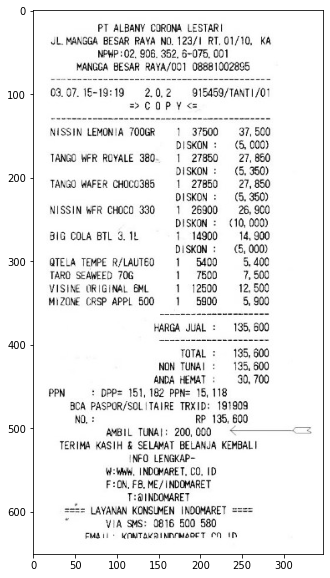

In [ ]:
file_name = "/content/struk20.JPG"
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE) 
plot_gray(image)

In [ ]:
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])
boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plot_rgb(boxes)

AttributeError: ignored

In [ ]:
extracted_text = pytesseract.image_to_string(image)
print(extracted_text)

In [ ]:
#def find_amounts(text):
    #amounts = re.findall(r'\d+[\s\,\.]\d+\b', text)
    #floats = [float(amount) for amount in amounts]
    #unique = list(dict.fromkeys(floats))
    #return unique

In [ ]:
def find_amounts(text):
  clean_output = re.sub(r'[^\w\d]', '', text)
  total = re.findall(r'total(\d+)', clean_output, re.IGNORECASE)
  total_in_number = int(total[0])
  return total_in_number

In [ ]:
amounts = find_amounts(extracted_text)
amounts